<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

# INFORME PREGUNTA 1
## ¿Qué dimensiones tienen los datos?

#####El rango de datos para el analisis en los resultados de las pruebas del ICFES para el acceso a la educaciòn superior es de **2001 a 2021.**
###¿Con cuántos años y periodos de evaluación se cuenta?
#####Con el fin de contar con el mayor rango de datos en el tiempo y con la menor cantidad de datos se decidio enfocar el analisis en los resultados de las pruebas del ICFES para el acceso a la educaciòn superior en 2000-1, 2011-1 y 2021-1, la cual cuenta **con mas de 125 mil registros.**
###¿Cuáles variables pueden ser de interés para la problemática planteada?
#####Se recomienda incluir en los analisis de los resultados de las pruebas del ICFES para el acceso a la educación superior variables como **ingresos y estrato de la familia del estudiante así como el departamento de ubicación del colegio.**
###¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?
#####Los **datos faltantes o no validos** de las bases de datos de los resultados de las pruebas del ICFES para el acceso a la educaciòn superior en 2001-1, 2011-1 y 2021-1 **no superaron 3% del total de registros, hecho que no afecta el analisis dado el tamaño final de la muestra con cerca de 121 mil registros**.


In [1]:
# Código

from google.colab import files

datos = files.upload()


Saving SB11_20211.csv to SB11_20211.csv
Saving SB11_20111.csv to SB11_20111.csv
Saving SB11_20001.csv to SB11_20001.csv


In [4]:
#Leer los archivos de datos y agregarlos según sea necesario.
#Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
#Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

import pandas as pd

#Inicialmente se leen los archivos csv originales, y se almacenan en un dataframe
#archivo 2000_1
data20001 = pd.read_csv('SB11_20001.csv', sep=';', encoding = 'unicode_escape')
print("Total elementos: "+str(data20001.size))
print("No. total filas: "+str(len(data20001.index)))

print("No. total columnas: "+str(len(data20001.columns)))
print("")
#archivo 2011_1
data20111 = pd.read_csv('SB11_20111.csv', sep=';', encoding = 'unicode_escape')
print("Total elementos: "+str(data20111.size))
print("No. total filas: "+str(len(data20111.index)))
print("No. total columnas: "+str(len(data20111.columns)))
print("")
#archivo 2021_1
data20211 = pd.read_csv('SB11_20211.csv', sep=';', encoding = 'unicode_escape')
print("Total elementos: "+str(data20211.size))
print("No. total filas: "+str(len(data20211.index)))
print("No. total columnas: "+str(len(data20211.columns)))
print("")

#¿Qué dimensiones tienen los datos?
#¿Con cuántos años y periodos de evaluación se cuenta?
#¿Cuáles variables pueden ser de interés para la problemática planteada?
#¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,12,14,15,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total elementos: 4424682
No. total filas: 77626
No. total columnas: 57

Total elementos: 3678708
No. total filas: 31713
No. total columnas: 116

Total elementos: 1211184
No. total filas: 15528
No. total columnas: 78



In [5]:
#Se crea una columna puntaje global para el año 2000_1, sumando las columnas ['PUNT_BIOLOGIA','PUNT_MATEMATICAS','PUNT_FILOSOFIA','PUNT_FISICA','PUNT_HISTORIA','PUNT_QUIMICA','PUNT_LENGUAJE','PUNT_GEOGRAFIA','PUNT_INTERDISCIPLINAR','PUNT_IDIOMA'] para cada estudiante
puntaje_global_2000_1 = data20001[['PUNT_BIOLOGIA','PUNT_MATEMATICAS','PUNT_FILOSOFIA','PUNT_FISICA','PUNT_HISTORIA','PUNT_QUIMICA','PUNT_LENGUAJE','PUNT_GEOGRAFIA','PUNT_INTERDISCIPLINAR','PUNT_IDIOMA']].sum(axis=1)
print(puntaje_global_2000_1)

0        527
1        526
2        560
3        578
4        603
        ... 
77621    385
77622    425
77623    504
77624    428
77625    402
Length: 77626, dtype: int64


In [6]:
#Se crea un dataframe para los datos del 2000_1, con las columnas PERIODO_PRESENTACION, FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,PUNTAJE_GLOBAL,ESTU_PUESTO del archivo csv original
df_datos_2000_1 = pd.DataFrame()
print("DataFrame 2000_1: \n")
periodo = ['2000_1']*len(data20001)
df_datos_2000_1['PERIODO_PRESENTACION'] = pd.Series(periodo)
df_datos_2000_1.loc[:,'FAMI_INGRESO_FMILIAR_MENSUAL'] = data20001['FAMI_INGRESO_FMILIAR_MENSUAL']
df_datos_2000_1.loc[:,'PUNTAJE_GLOBAL'] = puntaje_global_2000_1
df_datos_2000_1.loc[:,'COLE_DEPTO_UBICACION'] = data20001['COLE_DEPTO_UBICACION']
df_datos_2000_1 = df_datos_2000_1.assign(FAMI_ESTRATOVIVIENDA = 0)
df_datos_2000_1 = df_datos_2000_1.sort_values("PUNTAJE_GLOBAL", ascending = False)
df_datos_2000_1.loc[:,'ESTU_PUESTO'] = range(1,len(df_datos_2000_1.index)+1)

df_datos_2000_1.head()


DataFrame 2000_1: 



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
40274,2000_1,8,707,ATLANTICO,0,1
10076,2000_1,5,706,BOGOTA,0,2
7587,2000_1,8,705,BOGOTA,0,3
8063,2000_1,9,703,BOGOTA,0,4
7876,2000_1,7,700,BOGOTA,0,5


In [7]:
#Se cuentan los datos nulos del dataframe del 2000_1
total_nan_2000_1 = df_datos_2000_1.isna().sum()
print("Total nan 2000-1: "+str(total_nan_2000_1))
print("")
print("Total datos columna FAMI_INGRESO_FMILIAR_MENSUAL: "+str(len(df_datos_2000_1.loc[:,'FAMI_INGRESO_FMILIAR_MENSUAL'].index)))

Total nan 2000-1: PERIODO_PRESENTACION               0
FAMI_INGRESO_FMILIAR_MENSUAL    2070
PUNTAJE_GLOBAL                     0
COLE_DEPTO_UBICACION               0
FAMI_ESTRATOVIVIENDA               0
ESTU_PUESTO                        0
dtype: int64

Total datos columna FAMI_INGRESO_FMILIAR_MENSUAL: 77626


In [8]:
#Se eliminan los datos faltantes que se encuentren en la columna FAMI_INGRESO_FMILIAR_MENSUAL del dataframe del 2000_1
df_datos_2000_1 = df_datos_2000_1.dropna(subset=['FAMI_INGRESO_FMILIAR_MENSUAL'])
total_nan_2000_1 = df_datos_2000_1.isna().sum()
print("Total nan 2000-1: "+str(total_nan_2000_1))
print("")
print("Total datos columna FAMI_INGRESO_FMILIAR_MENSUAL: "+str(len(df_datos_2000_1.loc[:,'FAMI_INGRESO_FMILIAR_MENSUAL'].index)))
print("")
df_datos_2000_1.head()

Total nan 2000-1: PERIODO_PRESENTACION            0
FAMI_INGRESO_FMILIAR_MENSUAL    0
PUNTAJE_GLOBAL                  0
COLE_DEPTO_UBICACION            0
FAMI_ESTRATOVIVIENDA            0
ESTU_PUESTO                     0
dtype: int64

Total datos columna FAMI_INGRESO_FMILIAR_MENSUAL: 75556



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
40274,2000_1,8,707,ATLANTICO,0,1
10076,2000_1,5,706,BOGOTA,0,2
7587,2000_1,8,705,BOGOTA,0,3
8063,2000_1,9,703,BOGOTA,0,4
7876,2000_1,7,700,BOGOTA,0,5


In [9]:
#De igual manera que con el dataframe del 2000_1, se crea un dataframe simplificado de los datos del 2011_1, con las columnas respectivas

print("")
print("DataFrame 2011_1: \n")
df_datos_2011_1 = pd.DataFrame()
periodo = ['2011_1']*len(data20111)
df_datos_2011_1['PERIODO_PRESENTACION'] = pd.Series(periodo)
df_datos_2011_1.loc[:,'FAMI_INGRESO_FMILIAR_MENSUAL'] = data20111['FAMI_INGRESOFMILIARMENSUAL']
df_datos_2011_1 = df_datos_2011_1.assign(PUNTAJE_GLOBAL = 0)
df_datos_2011_1.loc[:,'COLE_DEPTO_UBICACION'] = data20111['COLE_DEPTO_UBICACION']
df_datos_2011_1.loc[:,'FAMI_ESTRATOVIVIENDA'] = data20111['FAMI_ESTRATOVIVIENDA']
df_datos_2011_1.loc[:,'ESTU_PUESTO'] = data20111['ESTU_PUESTO']

df_datos_2011_1.head()
#Posición
#Estrato
#Ubicación dpto.



DataFrame 2011_1: 



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
0,2011_1,Menos de 1 SMLV,0,BOGOTÁ,Estrato 2,879
1,2011_1,Entre 1 y menos de 2 SMLV,0,BOGOTÁ,Estrato 2,354
2,2011_1,Menos de 1 SMLV,0,BOGOTÁ,Estrato 2,543
3,2011_1,Entre 2 y menos de 3 SMLV,0,BOGOTÁ,Estrato 3,782
4,2011_1,Entre 1 y menos de 2 SMLV,0,BOGOTÁ,Estrato 3,495


In [10]:
#Se eliminan los datos nulos
total_nan_2011_1 = df_datos_2011_1.isna().sum()
print("Total nan 2011-1: "+str(total_nan_2011_1))
print("")
df_datos_2011_1 = df_datos_2011_1.dropna()
total_nan_2011_1 = df_datos_2011_1.isna().sum()
print(total_nan_2011_1)
print()
df_datos_2011_1.head()

Total nan 2011-1: PERIODO_PRESENTACION              0
FAMI_INGRESO_FMILIAR_MENSUAL    794
PUNTAJE_GLOBAL                    0
COLE_DEPTO_UBICACION              0
FAMI_ESTRATOVIVIENDA            790
ESTU_PUESTO                       0
dtype: int64

PERIODO_PRESENTACION            0
FAMI_INGRESO_FMILIAR_MENSUAL    0
PUNTAJE_GLOBAL                  0
COLE_DEPTO_UBICACION            0
FAMI_ESTRATOVIVIENDA            0
ESTU_PUESTO                     0
dtype: int64



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
0,2011_1,Menos de 1 SMLV,0,BOGOTÁ,Estrato 2,879
1,2011_1,Entre 1 y menos de 2 SMLV,0,BOGOTÁ,Estrato 2,354
2,2011_1,Menos de 1 SMLV,0,BOGOTÁ,Estrato 2,543
3,2011_1,Entre 2 y menos de 3 SMLV,0,BOGOTÁ,Estrato 3,782
4,2011_1,Entre 1 y menos de 2 SMLV,0,BOGOTÁ,Estrato 3,495


In [11]:
#Se crea un dataframe simplificado del 2021_1, con las columnas respectivas
print("")
print("DataFrame 2021_1: \n")
df_datos_2021_1 = pd.DataFrame()
periodo = ['2021_1']*len(data20211)
df_datos_2021_1['PERIODO_PRESENTACION'] = pd.Series(periodo)
df_datos_2021_1 = df_datos_2021_1.assign(FAMI_INGRESO_FMILIAR_MENSUAL = 0) 
df_datos_2021_1.loc[:,'PUNTAJE_GLOBAL'] = data20211["PUNT_GLOBAL"]
df_datos_2021_1.loc[:,'COLE_DEPTO_UBICACION'] = data20211['COLE_DEPTO_UBICACION']
df_datos_2021_1.loc[:,'FAMI_ESTRATOVIVIENDA'] = data20211["FAMI_ESTRATOVIVIENDA"]
df_datos_2021_1 = df_datos_2021_1.sort_values("PUNTAJE_GLOBAL", ascending = False)
df_datos_2021_1.loc[:,'ESTU_PUESTO'] = range(1,len(df_datos_2021_1.index)+1)

df_datos_2021_1.head()


DataFrame 2021_1: 



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
10202,2021_1,0,495,VALLE,Estrato 6,1
13602,2021_1,0,479,BOGOTÁ,Estrato 4,2
41,2021_1,0,476,VALLE,Estrato 3,3
13785,2021_1,0,473,ATLANTICO,Estrato 4,4
8096,2021_1,0,472,VALLE,Estrato 3,5


In [12]:
#Se cuentan los datos nulos de la data del 2021_1
total_nan_2021_1 = df_datos_2021_1.isna().sum()
print("Total nan 2021-1: "+str(total_nan_2021_1))
print("")
#Se eliminan los datos nulos o faltantes
df_datos_2021_1 = df_datos_2021_1.dropna()
total_nan_2021_1 = df_datos_2021_1.isna().sum()
print(total_nan_2021_1)
print()
df_datos_2021_1.head()

Total nan 2021-1: PERIODO_PRESENTACION              0
FAMI_INGRESO_FMILIAR_MENSUAL      0
PUNTAJE_GLOBAL                    0
COLE_DEPTO_UBICACION              0
FAMI_ESTRATOVIVIENDA            756
ESTU_PUESTO                       0
dtype: int64

PERIODO_PRESENTACION            0
FAMI_INGRESO_FMILIAR_MENSUAL    0
PUNTAJE_GLOBAL                  0
COLE_DEPTO_UBICACION            0
FAMI_ESTRATOVIVIENDA            0
ESTU_PUESTO                     0
dtype: int64



,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
10202,2021_1,0,495,VALLE,Estrato 6,1
13602,2021_1,0,479,BOGOTÁ,Estrato 4,2
41,2021_1,0,476,VALLE,Estrato 3,3
13785,2021_1,0,473,ATLANTICO,Estrato 4,4
8096,2021_1,0,472,VALLE,Estrato 3,5


In [13]:
print(len(df_datos_2021_1))

14772


In [ ]:
#Se verifica que en la data del 2021_1, no se tengan indices duplicados
df_datos_2021_1[df_datos_2021_1.index.duplicated()]

,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO


In [14]:
#Se concatenan los tres dataframes creados para los años 2000_1, 2011_1 y 2021_1

#df_datos_2021_1 = pd.DataFrame()
df_global = pd.concat([df_datos_2000_1,df_datos_2011_1,df_datos_2021_1],ignore_index=True)

print("Tamaño df: "+str(len(df_global)))
#print(df_global.iloc[110000:110010,:])
df_global.head()

Tamaño df: 121071


,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
0,2000_1,8,707,ATLANTICO,0,1
1,2000_1,5,706,BOGOTA,0,2
2,2000_1,8,705,BOGOTA,0,3
3,2000_1,9,703,BOGOTA,0,4
4,2000_1,7,700,BOGOTA,0,5


In [ ]:
#Se verifica los datos únicos que se encuentran en la columna PERIODO_PRESENTACION, del dataframe global, que es la concatenación de los tres anteriores.

df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
#Se modifican los datos de la columna FAMI_INGRESO_FMILIAR_MENSUAL del dataframe global, donde se establecen datos enteros para cada nivel de SMLV

#Menos de 1 SMLV
#Entre 1 y menos de 2 SMLV
#Entre 2 y menos de 3 SMLV
#Entre 3 y menos de 5 SMLV
#Entre 5 y menos de 7 SMLV
#Entre 7 y menos de 10 SMLV
#10 o más SMLV

for i in range(len(df_global)):
  if df_global.iloc[i,1] == 'Menos de 1 SMLV':
    df_global.iloc[i,1] = 1
  elif df_global.iloc[i,1] == 'Entre 1 y menos de 2 SMLV':
    df_global.iloc[i,1] = 2
  elif df_global.iloc[i,1] == 'Entre 2 y menos de 3 SMLV':
    df_global.iloc[i,1] = 3
  elif df_global.iloc[i,1] == 'Entre 3 y menos de 5 SMLV':
    df_global.iloc[i,1] = 4
  elif df_global.iloc[i,1] == 'Entre 5 y menos de 7 SMLV':
    df_global.iloc[i,1] = 6
  elif df_global.iloc[i,1] == 'Entre 7 y menos de 10 SMLV':
    df_global.iloc[i,1] = 8
  elif df_global.iloc[i,1] == '10 o más SMLV':
    df_global.iloc[i,1] = 10

print(df_global.iloc[:,1])

0         8
1         5
2         8
3         9
4         7
         ..
108779    0
108780    0
108781    0
108782    0
108783    0
Name: FAMI_INGRESO_FMILIAR_MENSUAL, Length: 108784, dtype: object


In [ ]:
#Se eliminan las filas de la columna FAMI_INGRESO_FMILIAR_MENSUAL del dataframa global, que contengan @

df_global = df_global.drop(df_global[df_global['FAMI_INGRESO_FMILIAR_MENSUAL'] == '@'].index)

In [ ]:
df_global['FAMI_INGRESO_FMILIAR_MENSUAL'].unique()

array(['8', '5', '9', '7', '6', '4', '2', '3', '1', '0', 1, 2, 3, 4, 6,
       10, 8, 0], dtype=object)

In [18]:
#Se eliminan los datos faltantes del dataframe global
df_global = df_global.dropna()
df_global

,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
0,2000_1,8,707,ATLANTICO,0,1
1,2000_1,5,706,BOGOTA,0,2
2,2000_1,8,705,BOGOTA,0,3
3,2000_1,9,703,BOGOTA,0,4
4,2000_1,7,700,BOGOTA,0,5
...,...,...,...,...,...,...
121066,2021_1,0,138,VALLE,Estrato 1,15521
121067,2021_1,0,138,CALDAS,Estrato 2,15522
121068,2021_1,0,136,CESAR,Estrato 1,15524
121069,2021_1,0,135,VALLE,Estrato 6,15525


In [16]:
df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [19]:
#Se convierten todos los datos del dataframe global en la columna FAMI_INGRESO_FMILIAR_MENSUAL a enteros
for i in range(len(df_global)):
  df_global.iloc[i,1] = int(df_global.iloc[i,1])

ValueError: ignored

In [20]:
df_global['FAMI_INGRESO_FMILIAR_MENSUAL'].unique()

array([8, 5, 9, 7, 6, 4, 2, 3, 1, 0, '@', '4', '2', '1', '0', '6', '8',
       '3', '5', '7', '9', 'Menos de 1 SMLV', 'Entre 1 y menos de 2 SMLV',
       'Entre 2 y menos de 3 SMLV', 'Entre 3 y menos de 5 SMLV',
       'Entre 5 y menos de 7 SMLV', '10 o más SMLV',
       'Entre 7 y menos de 10 SMLV'], dtype=object)

In [21]:
#Acá se convierte el dataframe global a un archivo de excel
df_global.to_excel('df_global2.xlsx')

In [22]:
#Se agrupa la columna COLE_DEPTO_UBICACION del dataframe global, y se calcula la media de ESTU_PUESTO para cada COLE_DEPTO_UBICACION
gb1 = df_global.groupby('COLE_DEPTO_UBICACION')['ESTU_PUESTO'].mean()
print(gb1)

COLE_DEPTO_UBICACION
ANTIOQUIA          19429.818405
ARAUCA             31182.606936
ATLANTICO          20377.196501
BOGOTA             29613.313617
BOGOTÁ              2145.442282
BOLIVAR            14847.034568
BOYACA             13674.807640
CALDAS             13735.969159
CAQUETA            37007.154321
CASANARE           17587.057307
CAUCA              33109.907801
CESAR              16414.750484
CHOCO              51505.848485
CORDOBA            40279.821101
CUNDINAMARCA       10224.310874
GUAINIA            14915.954545
GUAVIARE           10794.500000
HUILA              24754.393736
LA GUAJIRA         23168.284123
MAGDALENA          22452.721354
META               23686.220162
NARIO             37191.381066
NARIÑO              4413.643172
NORTE SANTANDER    22286.969191
PUTUMAYO           26125.631336
QUINDIO            33452.907530
RISARALDA          21871.334858
SANTANDER          14631.789731
SUCRE              52625.353846
TOLIMA             16809.780096
VALLE              

In [ ]:
df_gb1 = pd.DataFrame(gb1)
df_gb1

,ESTU_PUESTO
COLE_DEPTO_UBICACION,
ANTIOQUIA,21643.671879
ARAUCA,31181.786585
ATLANTICO,20789.930377
BOGOTA,28102.357954
BOGOTÁ,2430.357977
BOLIVAR,16056.845938
BOYACA,19463.461856
CALDAS,13784.602753
CAQUETA,36497.368590


In [ ]:
#Se organiza la media calculada por cada departamento, de forma ascendente
df_gb1 = df_gb1.sort_values('ESTU_PUESTO')
df_gb1

,ESTU_PUESTO
COLE_DEPTO_UBICACION,
BOGOTÁ,2430.357977
NARIÑO,5727.475467
CUNDINAMARCA,10745.244502
GUAVIARE,10794.500000
CALDAS,13784.602753
GUAINIA,14915.954545
SANTANDER,15112.502326
BOLIVAR,16056.845938
TOLIMA,18026.566055


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

# INFORME PREGUNTA 2
##¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
####El resultado del examen de ingreso a la educación superior se correlaciona con las variables de ingresos de la familia del estudiante, estrato de la familia y departamento de ubicación del colegio.
##¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
####El analisis evidencia que un mejor resultado en las pruebas descritas depende en parte de mayores ingresos y estrato más alto de la familia, y de manera general en el departamento donde se ubica el estudiante.
###¿Sobre cuáles variables vale la pena hacer un análisis más profundo?
####Se recomienda profundizar el analisis de las variables de estrato de la familia y departamento de ubicación del estudiante. 
###Preguntas
####1.El departamento de ubicación del estudiante incide en la media de los resultados de la prueba analizada
####2.El estrato donde esta ubicada la familia del estudiante predice mejores o menores media de desempeño en la pruebas Saber 11.
####3. Estudiantes de estratos altos (5-6) tienen mejores medias de desempeño en el anterior examen.

 


In [ ]:
df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
#Se crean listas para el departamento y la media calculada

departamento = []
media = []

for i in range(len(df_gb1)):
  departamento.append(df_gb1.index[i])
  media.append(df_gb1.iloc[i,0])

print(departamento)
print(media)

['VAUPES', 'BOGOTÁ', 'NARIÑO', 'CUNDINAMARCA', 'GUAVIARE', 'BOYACA', 'CALDAS', 'SANTANDER', 'BOLIVAR', 'GUAINIA', 'CESAR', 'TOLIMA', 'CASANARE', 'ANTIOQUIA', 'ATLANTICO', 'RISARALDA', 'NORTE SANTANDER', 'MAGDALENA', 'LA GUAJIRA', 'META', 'HUILA', 'PUTUMAYO', 'VALLE', 'BOGOTA', 'ARAUCA', 'CAUCA', 'QUINDIO', 'CAQUETA', 'NARI\x84O', 'CORDOBA', 'CHOCO', 'SUCRE']
[692.6666666666666, 2145.442282488154, 4413.643171806168, 10224.31087408949, 10794.5, 13674.80763983629, 13735.969158878504, 14631.789731051345, 14847.034567901235, 14915.954545454546, 16414.750483558993, 16809.780096308186, 17587.057306590257, 19424.45236501562, 20377.196501220504, 21871.33485818847, 22286.96919127086, 22452.721354166668, 23168.284122562673, 23686.220162224796, 24662.867713004485, 26125.22685185185, 28496.282263579073, 29613.60366671635, 31182.606936416185, 33102.05168011439, 33452.907529722586, 37007.154320987655, 37191.21216945255, 40279.821100917434, 51505.84848484849, 52625.35384615385]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)


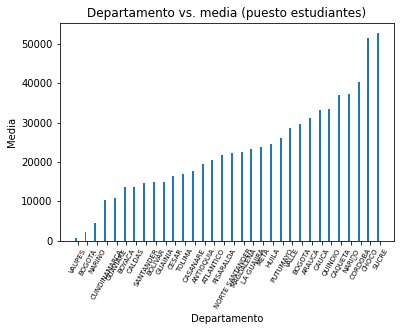

In [ ]:
#Se grafica departamento vs. media calculada (Puestos estudiante)

import matplotlib.pyplot as plt

numero_grupos = len(departamento)
indice_barras = np.arange(numero_grupos)
ancho_barras = 0.20
plt.bar(indice_barras,media, width = ancho_barras, label='media por dpto.')
plt.xticks(indice_barras+ancho_barras, departamento, rotation = 60,fontsize=7)
plt.title("Departamento vs. media (puesto estudiantes)")
plt.xlabel("Departamento")
plt.ylabel("Media")
plt.show()

In [ ]:
#Se extrae la columna puntaje global y fami ingreso de la data del 2000_1, del dataframe global, y se almacenan en variables

puntaje_global_df_20001 = df_global['PUNTAJE_GLOBAL'][(df_global.PERIODO_PRESENTACION == "2000_1")]
fami_ingreso_df_20001 = df_global['FAMI_INGRESO_FMILIAR_MENSUAL'][(df_global.PERIODO_PRESENTACION == "2000_1")]
print(puntaje_global_df_20001,fami_ingreso_df_20001)

0        707
1        706
2        705
3        703
4        700
        ... 
75551    212
75552    209
75553    201
75554    180
75555    174
Name: PUNTAJE_GLOBAL, Length: 75516, dtype: int64 0        8
1        5
2        8
3        9
4        7
        ..
75551    0
75552    1
75553    0
75554    0
75555    0
Name: FAMI_INGRESO_FMILIAR_MENSUAL, Length: 75516, dtype: object


In [ ]:
#Estos datos se almacenan en una lista
puntaje_global_df_20001 = [puntaje_global_df_20001]
print(type(puntaje_global_df_20001))

<class 'list'>


In [ ]:
fami_ingreso_df_20001 = [fami_ingreso_df_20001]
print(type(fami_ingreso_df_20001))

<class 'list'>


In [ ]:
df_global.head()

,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
0,2000_1,8,707,ATLANTICO,0,1
1,2000_1,5,706,BOGOTA,0,2
2,2000_1,8,705,BOGOTA,0,3
3,2000_1,9,703,BOGOTA,0,4
4,2000_1,7,700,BOGOTA,0,5


In [ ]:
df_global['FAMI_ESTRATOVIVIENDA'].unique()

array([0, 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6',
       'Estrato 1', 'Sin Estrato'], dtype=object)

In [ ]:
#Se eliminan las filas del dataframe global que en la columna FAMI_ESTRATOVIVIENDA tengan como valor, sin estrato
df_global = df_global.drop(df_global[df_global['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato'].index)

In [ ]:
df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
df_global['FAMI_ESTRATOVIVIENDA'].unique()

array([0, 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6',
       'Estrato 1'], dtype=object)

In [ ]:
#Se modifican los datos de la columna FAMI_ESTRATOVIVIENDA, donde se convierten las cadenas de caracteres como Estrato 1, a un 1 entero

for i in range(len(df_global)):
  if df_global.iloc[i,4] == 'Estrato 1':
    df_global.iloc[i,4] = 1
  elif df_global.iloc[i,4] == 'Estrato 2':
    df_global.iloc[i,4] = 2
  elif df_global.iloc[i,4] == 'Estrato 3':
    df_global.iloc[i,4] = 3
  elif df_global.iloc[i,4] == 'Estrato 4':
    df_global.iloc[i,4] = 4
  elif df_global.iloc[i,4] == 'Estrato 5':
    df_global.iloc[i,4] = 5
  elif df_global.iloc[i,4] == 'Estrato 6':
    df_global.iloc[i,4] = 6


In [ ]:
df_global['FAMI_ESTRATOVIVIENDA'].unique()

array([0, 2, 3, 4, 5, 6, 1], dtype=object)

In [ ]:
df_global['FAMI_INGRESO_FMILIAR_MENSUAL'].unique()

array([8, 5, 9, 7, 6, 4, 2, 3, 1, 0, 10], dtype=object)

In [ ]:
df_global.to_excel('df_global3.xlsx')

In [ ]:
#Se crea un dataframe global auxiliar
df_global_auxiliar = df_global

In [ ]:
df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
#df_global = df_global.drop(df_global[df_global['FAMI_ESTRATOVIVIENDA'] == 0].index)

In [ ]:
df_global['PERIODO_PRESENTACION'].unique() #Cuando se eliminan las familias que tienen estrato 0, se eliminan los datos del 2000_1

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
df_global['FAMI_ESTRATOVIVIENDA'].unique()

array([0, 2, 3, 4, 5, 6, 1], dtype=object)

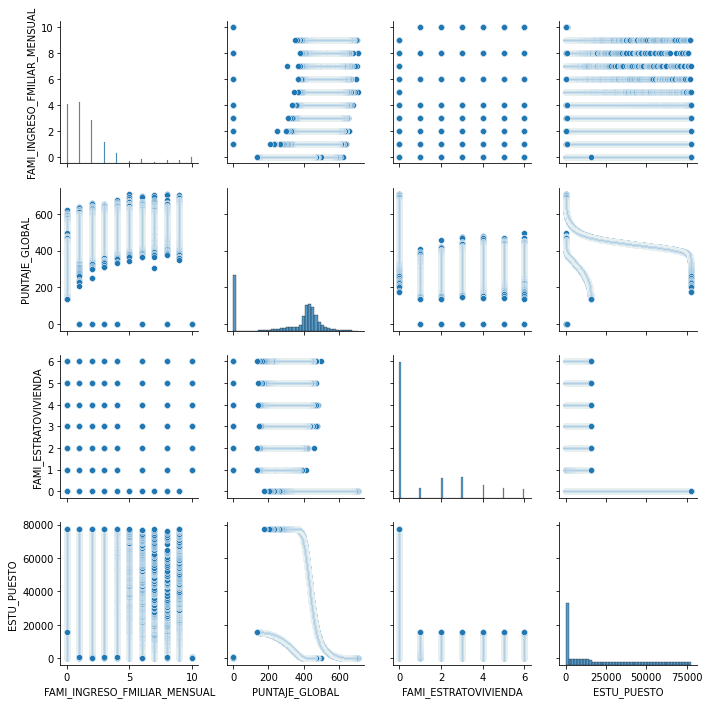

In [ ]:
import seaborn as sns
#Se grafica con seaborn pairplot, el dataframe global
sns.pairplot(df_global)

In [ ]:
df_global['PERIODO_PRESENTACION'].unique()

array(['2000_1', '2011_1', '2021_1'], dtype=object)

In [ ]:
#Se extrae un dataframe únicamente con los datos del 2000_1, del dataframe global
df_global_2000_1 = df_global[:] [df_global['PERIODO_PRESENTACION'] == '2000_1']

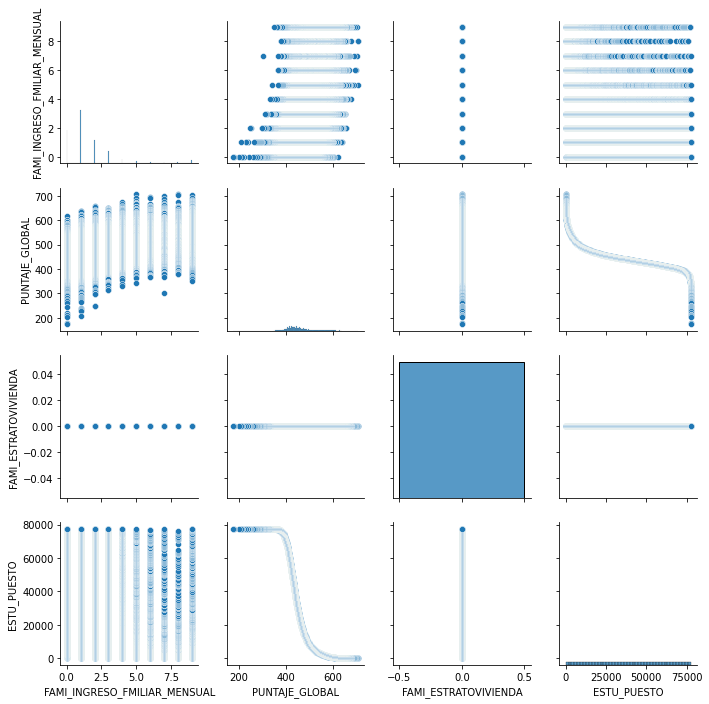

In [ ]:
#Se grafica con pairplot de seaborn, la data del 2000_1
sns.pairplot(df_global_2000_1)

In [ ]:
#Se extrae un dataframe del 2011_1
df_global_2011_1 = df_global[:] [df_global['PERIODO_PRESENTACION'] == '2011_1']

In [ ]:
df_global_2011_1.head()

,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
75556,2011_1,1,0,BOGOTÁ,2,879
75557,2011_1,2,0,BOGOTÁ,2,354
75558,2011_1,1,0,BOGOTÁ,2,543
75559,2011_1,3,0,BOGOTÁ,3,782
75560,2011_1,2,0,BOGOTÁ,3,495


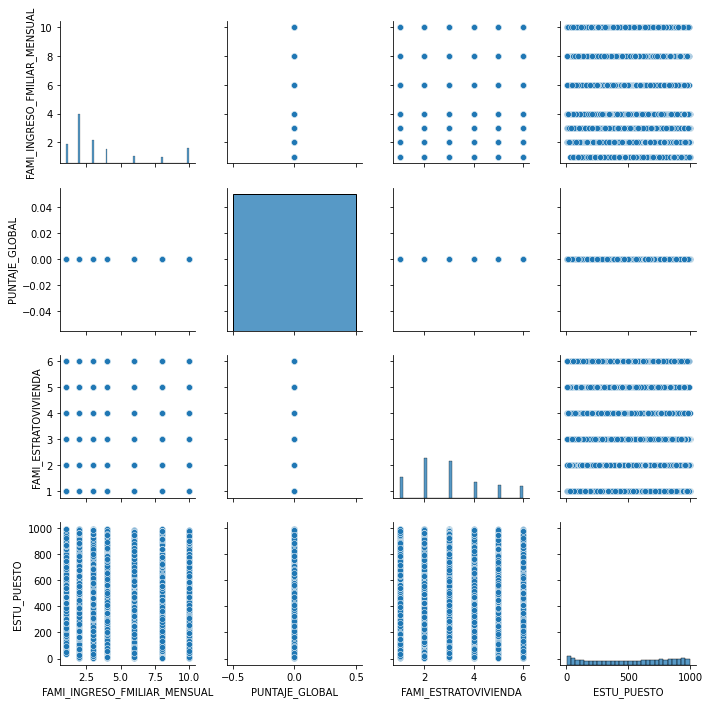

In [ ]:
#Se grafica
sns.pairplot(df_global_2011_1)

In [ ]:
#Se extrae un dataframe del 2021_1, del dataframe global
df_global_2021_1 = df_global[:] [df_global['PERIODO_PRESENTACION'] == '2021_1']

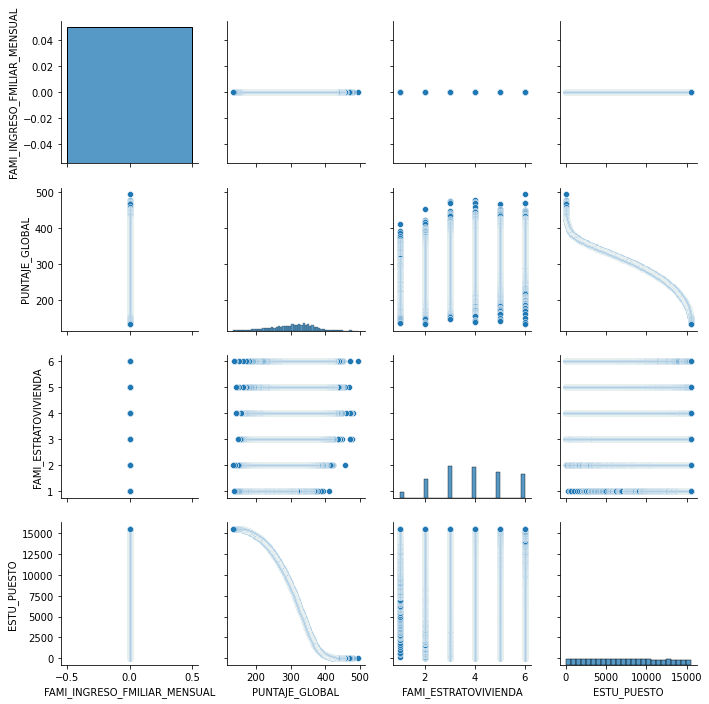

In [ ]:
#Se grafica
sns.pairplot(df_global_2021_1)

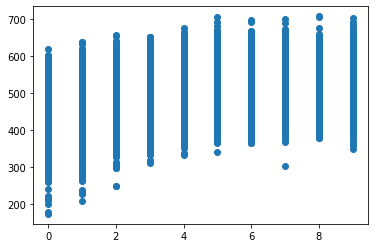

In [ ]:
#Se grafica fami_ingreso del 2000_1 vs. puntaje_global del 2000_1
plt.scatter(fami_ingreso_df_20001,puntaje_global_df_20001)
plt.show()

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

# INFORME PREGUNTA 3
###¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
#### Las variables estrato del estudiante y departamento de ubicación explican el desempeño del estudiante en la prueba.
###Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil 50 en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?
###La variable estrato explica si un estudiante puede ser considerado como de riesgo.

# Conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.
###El model indica que los estudiantes de estratos mas altos tendran un mejor desempeño en la prueba. 

In [23]:
# Código

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#Se toma como variable X, los datos de la columna FAMI_ESTRATOVIVIENDA, del dataframe del 2021_1
#Se toma como variable Y, los datos de la columna PUNTAJE_GLOBAL, del dataframe del 2021_1
x = df_global_2021_1['FAMI_ESTRATOVIVIENDA']
y = df_global_2021_1['PUNTAJE_GLOBAL']

#Se generan los datos X y Y, de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5)
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state = 42)

print("X train: ")
print(X_train)
print("")
print("y_train: ")
print(y_train)

#Se reorganiza la información
X_train = X_train.values.reshape([X_train.values.shape[0],1])
X_test = X_test.values.reshape([X_test.values.shape[0],1])

# Se crea el modelo de regresión lineal
regr = linear_model.LinearRegression()

# Se entrena el modelo usando los datos de entrenamiento
regr.fit(X_train, y_train)

# se hacen predicciones usandos los datos de prueba
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

# Se grafican las salidas
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: ignored

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

###¿Cuál es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
#### Cual es el desempeño en la prueba por departamento de ubicación por estrato del estudiante.
###¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?
#### Permite explorar las diferencias de resultados en las pruebas dadas las diferencias geograficas y de estratos de los estudiantes.

###Las instrucciones necesarias para que un usuario la pueda utilizar.
####Ubique el departamento a analizar y se visualizaran los resultados del puntaje global en la prueba por estrato del estudiante.


In [ ]:
# Código
#df_global_2021_1
df_global_2021_1.head()

,PERIODO_PRESENTACION,FAMI_INGRESO_FMILIAR_MENSUAL,PUNTAJE_GLOBAL,COLE_DEPTO_UBICACION,FAMI_ESTRATOVIVIENDA,ESTU_PUESTO
94012,2021_1,0,495.0,VALLE,6,1.0
94013,2021_1,0,479.0,BOGOTÁ,4,2.0
94014,2021_1,0,476.0,VALLE,3,3.0
94015,2021_1,0,473.0,ATLANTICO,4,4.0
94016,2021_1,0,472.0,VALLE,3,5.0


In [ ]:
import panel as pn
import plotly.graph_objects as go
import pandas as pd
pn.extension('plotly')

titulo = '# Media puntaje global por estrato y departamento'

In [ ]:
def valores_filtro_columna(columna):
  columna = columna.astype(str)
  valores = columna.unique().tolist()
  valores = sorted(valores)
  valores.insert(0,"Todos")
  return valores

In [ ]:
seleccion = pn.widgets.Select(name='Select', options= valores_filtro_columna(df_global_2021_1["COLE_DEPTO_UBICACION"]))
seleccion

Select(options=['Todos', 'ANTIOQUIA', ...], value='Todos')

In [2]:
@pn.depends(seleccion.param.value)

def funcion_interactiva(seleccion):

  df = df_global_2021_1[:] [df_global_2021_1['COLE_DEPTO_UBICACION'] == seleccion]
  gb1 = df.groupby('FAMI_ESTRATOVIVIENDA')['PUNTAJE_GLOBAL'].mean()
  df_gb1 = pd.DataFrame(gb1)
  df_x = list(df_gb1.iloc[:,0])
  df_y = list(df_gb1.index)

  fig = go.Figure(go.Bar(
      x = df_x,
      y = df_y,
      marker_color = 'rgb(26,118,255)',
      orientation = 'h'
    )
  )

  fig.update_layout(
      barmode = 'stack',
      yaxis_title = 'Estrato',
      xaxis_title = str(seleccion)+" - Media puntaje global",
      title = 'Puntaje global vs estrato',
      xaxis = dict(showgrid=False),
      yaxis = dict(showgrid=False),
      plot_bgcolor = 'white',
      showlegend=False,
      yaxis_range=[6, 1]
  )

  return fig


funcion_interactiva('ATLANTICO')

NameError: ignored

In [ ]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), funcion_interactiva)

In [ ]:
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(options=['Todos', 'ANTIOQUIA', ...], value='ANTIOQUIA')
    [1] ParamFunction(function)

[1, 2, 3, 4, 5, 6] 
[242.28571428571428, 256.9086757990868, 279.656338028169, 334.3880597014925, 340.377427184466, 343.8415015641293] 
[1, 2, 3, 4, 5, 6] 
[190.609756097561, 185.5, 251.6, 331.54545454545456, 346.88461538461536, 347.57142857142856] 
[1, 2, 3, 4, 5, 6] 
[338.0, 298.5, 325.0, 326.53333333333336, 337.6, 337.9117647058824] 
[1, 2, 3, 4, 5, 6] 
[242.20987654320987, 274.4888888888889, 294.94520547945206, 311.29126213592235, 310.39473684210526, 252.6] 
[1, 2, 3, 4, 5, 6] 
[205.0, 236.78571428571428, 303.72727272727275, 342.8965517241379, 375.2105263157895, 356.0] 
[1, 2, 3, 4, 5, 6] 
[234.82608695652175, 249.09183673469389, 307.50531914893617, 328.45896656534956, 329.02904564315355, 333.60913705583755]